# Smart Phone Sale Prediction

## K-Nearest Neighbour

**In this project we are going to use K-Nearest Neighbour (KNN) algorithm to predict if the customer will purchase a smartphone or not given their gender, age and salary.**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
dataset = pd.read_csv("smartphone.csv")
dataset.head()

,Gender,Age,Salary,Purchase
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
# Extract the shape of the dataset to find the rows and columns
print(dataset.shape)

(400, 4)


In [4]:
# Mapping Gender Data to Binary value
gender_set = set(dataset['Gender'])
dataset['Gender'] = dataset['Gender'].map({'Male': 1,'Female': 0}).astype(int)
print(dataset.head)

<bound method NDFrame.head of      Gender  Age  Salary  Purchase 
0         1   19   19000          0
1         1   35   20000          0
2         0   26   43000          0
3         0   27   57000          0
4         1   19   76000          0
..      ...  ...     ...        ...
395       0   46   41000          1
396       1   51   23000          1
397       0   50   20000          1
398       1   36   33000          0
399       0   49   36000          1

[400 rows x 4 columns]>


In [5]:
# Segregating the dataset into independent variable x and dependent variable y
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [6]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [7]:
# Feature Scaling - we scale our data to make all the featured contribute equally to the result
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train)

[[-0.98019606  0.58164944 -0.88670699]
 [ 1.02020406 -0.60673761  1.46173768]
 [-0.98019606 -0.01254409 -0.5677824 ]
 [-0.98019606 -0.60673761  1.89663484]
 [-0.98019606  1.37390747 -1.40858358]
 [-0.98019606  1.47293972  0.99784738]
 [ 1.02020406  0.08648817 -0.79972756]
 [ 1.02020406 -0.01254409 -0.24885782]
 [-0.98019606 -0.21060859 -0.5677824 ]
 [-0.98019606 -0.21060859 -0.19087153]
 [-0.98019606 -0.30964085 -1.29261101]
 [ 1.02020406 -0.30964085 -0.5677824 ]
 [ 1.02020406  0.38358493  0.09905991]
 [-0.98019606  0.8787462  -0.59677555]
 [-0.98019606  2.06713324 -1.17663843]
 [ 1.02020406  1.07681071 -0.13288524]
 [-0.98019606  0.68068169  1.78066227]
 [-0.98019606 -0.70576986  0.56295021]
 [-0.98019606  0.77971394  0.35999821]
 [-0.98019606  0.8787462  -0.53878926]
 [ 1.02020406 -1.20093113 -1.58254245]
 [ 1.02020406  2.1661655   0.93986109]
 [-0.98019606 -0.01254409  1.22979253]
 [ 1.02020406  0.18552042  1.08482681]
 [-0.98019606  0.38358493 -0.48080297]
 [ 1.02020406 -0.30964085

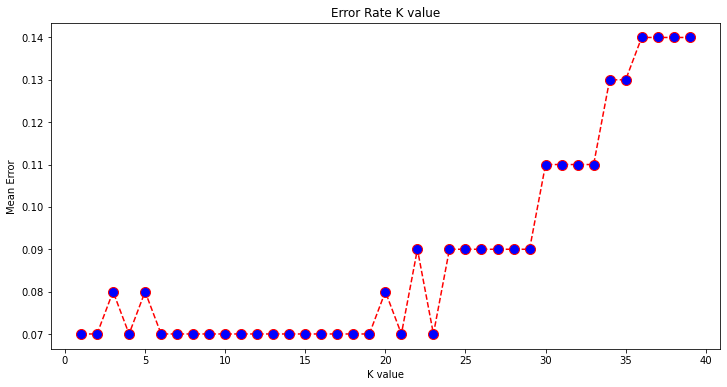

In [8]:
# Finding the best K value
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i, metric="minkowski",p=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) # Predicting the test data
    error.append(np.mean(y_pred!=y_test))
# print(error)

# Data Visualization
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color = 'red', linestyle="dashed", marker='o', markerfacecolor = 'blue', markersize= 10)
plt.title("Error Rate K value")
plt.xlabel("K value")
plt.ylabel("Mean Error")
plt.show()

In [9]:
# To find the K value with the formula and without visualizing the graph
list_a = np.array(error)
list_b = []
l_a=[]
l_b=[]
for i in range(1,40):
    list_b.append(i)
l_a.append(min(list_a))
l_b.append(min(list_b))
print(l_a)
print(l_b)

[0.07]
[1]


In [10]:
def run_euc(l_a,l_b):
  return np.array([[np.linalg.norm(i-j) for j in l_b] for i in l_a])
z = run_euc(l_a, l_b)
print(z)

[[0.93]]


In [11]:
print(np.round(z))

[[1.]]


In [12]:
# Train the algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1, metric="minkowski",p=2) # Calculating for K = 6
# For Euclidean distance we have to specify metric as minkowski and p=2
# For Manhattan distance we have to specify metric as minkowski and p=1
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
# Predicting whether new customer with Age and Salary will Buy or Not
age = int(input("Enter the customer's age: "))
salary = int(input("Enter the customer's salary: "))
gender = int(input("Enter your gender: "))
customer = [[age,salary,gender]]
result = model.predict(sc.transform(customer))
print(result)
if(result==1):
    print("Customer will Buy")
else:
    print("Customer will not Buy")

Enter the customer's age: 50
Enter the customer's salary: 50000
Enter your gender: 0
[1]
Customer will Buy


In [14]:
# Prediction for all Test Data
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [15]:
# Predicting the accuracy
from math import sqrt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm)
print("Accuracy of the model: {}%".format(accuracy_score(y_test,y_pred)*100))
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error:", rmse)
mae = sqrt(mean_absolute_error(y_test, y_pred))
print("Mean Absolute Error:", mae)

Confusion Matrix: 
[[64  4]
 [ 3 29]]
Accuracy of the model: 93.0%
Precision score: 0.8787878787878788
Recall score: 0.90625
Mean Squared Error: 0.2645751311064591
Mean Absolute Error: 0.2645751311064591
